In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_1 = '/content/drive/MyDrive/Data/recommendations.csv'
file_path_2 = '/content/drive/MyDrive/Data/games.csv'
file_path_3 = '/content/drive/MyDrive/Data/users.csv'
df_rec = pd.read_csv(file_path_1)
df_item = pd.read_csv(file_path_2)
df_user = pd.read_csv(file_path_3)

In [ ]:
# data recommendation
df_rec.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [ ]:
# data item (game)
df_item.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [ ]:
df_user.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


# process with data recomendation

In [ ]:
# replace category True , False of is_recommended by binary code
def replace(val):
    if val == True:
        return 1
    else:
        return 0
df_rec['is_recommended'] = df_rec['is_recommended'].apply(lambda x : replace(x))

In [ ]:
df_rec.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,1,36.3,51580,0
1,304390,4,0,2017-02-17,0,11.5,2586,1
2,1085660,2,0,2019-11-17,1,336.5,253880,2
3,703080,0,0,2022-09-23,1,27.4,259432,3
4,526870,0,0,2021-01-10,1,7.9,23869,4


In [ ]:
# consider that date attribute difficult to using
# helpful and funny are evaluate of other users for this review
del df_rec['date']
del df_rec['helpful']
del df_rec['funny']

* normalizing value of column

In [ ]:
df_rec.head()

,app_id,is_recommended,hours,user_id,review_id
0,975370,1,36.3,51580,0
1,304390,0,11.5,2586,1
2,1085660,1,336.5,253880,2
3,703080,1,27.4,259432,3
4,526870,1,7.9,23869,4


In [ ]:
max_hours = df_rec['hours'].max()
min_hours = df_rec['hours'].min()
df_rec['hours'] = df_rec['hours'].apply(lambda x: x/(max_hours-min_hours))


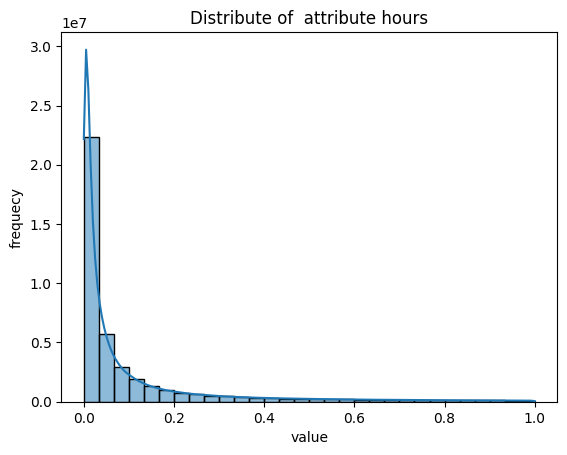

In [ ]:
import seaborn as sns

sns.histplot(df_rec['hours'], bins=30, kde=True)
plt.title('Distribute of  attribute hours')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()


## Process with data item

In [ ]:
df_item.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


* attribute rating

In [ ]:
df_item_1 = df_item.copy()


In [ ]:
df_item_1['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [ ]:
def label_rating(r):
    if r == 'Very Positive':
        return 7
    if r == 'Positive':
        return 5
    if r == 'Mixed':
        return 4
    if r == 'Mostly Positive':
        return 6
    if r == 'Overwhelmingly Positive':
        return 8
    if r == 'Negative':
        return 3
    if r == 'Mostly Negative':
        return 1
    if r == 'Overwhelmingly Negative':
        return 0
    if r == 'Very Negative':
        return 2
df_item_1['rating'] =df_item_1['rating'].apply(lambda x : label_rating(x))

In [ ]:
df_item_1['rating'] = df_item_1['rating'].apply(lambda x: x / 8)

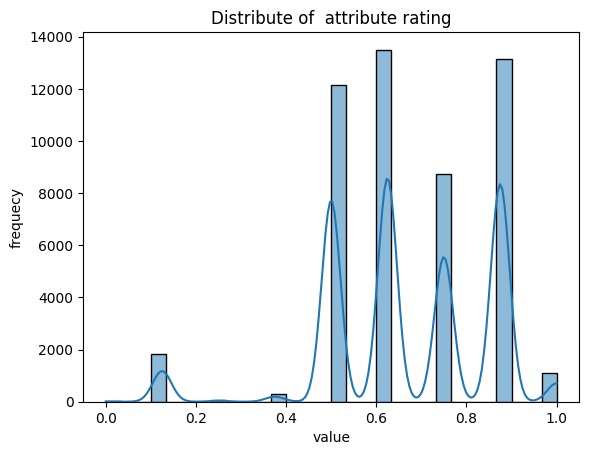

In [ ]:
sns.histplot(df_item_1['rating'], bins=30, kde=True)
plt.title('Distribute of  attribute rating')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()

* attribute price

In [ ]:
df_item_1['price_final'] = df_item_1['price_final'].apply(lambda x : x/(10))

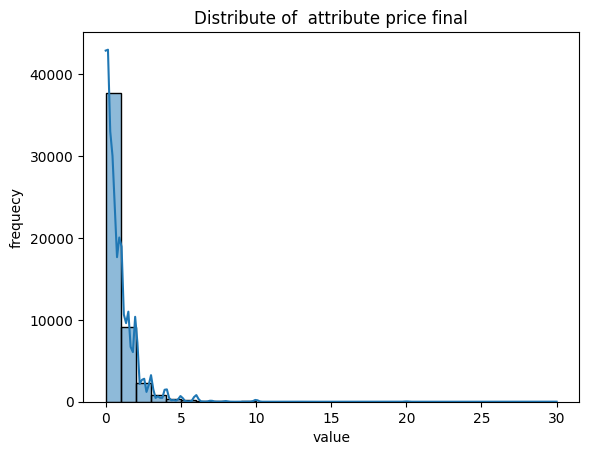

In [ ]:
sns.histplot(df_item_1['price_final'], bins=30, kde=True)
plt.title('Distribute of  attribute price final')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()

In [ ]:
# remove discount and price original
del df_item_1['price_original']
del df_item_1['discount']

* positive ratio

In [ ]:
# positive ratio is the percentage of user with positive interation to the item
max_ratio = df_item_1['positive_ratio'].max()
min_ratio = df_item_1['positive_ratio'].min()

df_item_1['positive_ratio'] = df_item_1['positive_ratio'].apply(lambda x : x /(max_ratio - min_ratio))

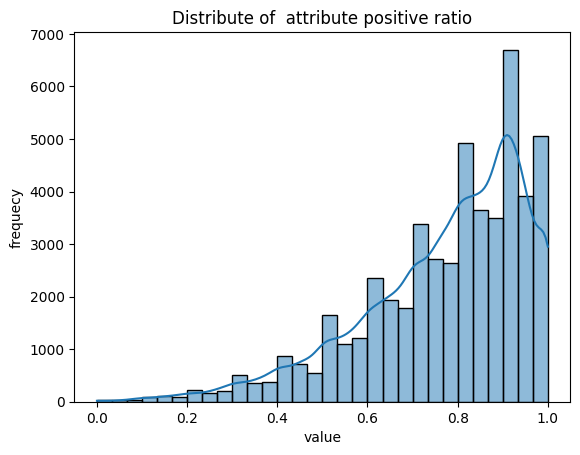

In [ ]:
# distribution of positive ratio
sns.histplot(df_item_1['positive_ratio'], bins=30, kde=True)
plt.title('Distribute of  attribute positive ratio')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()

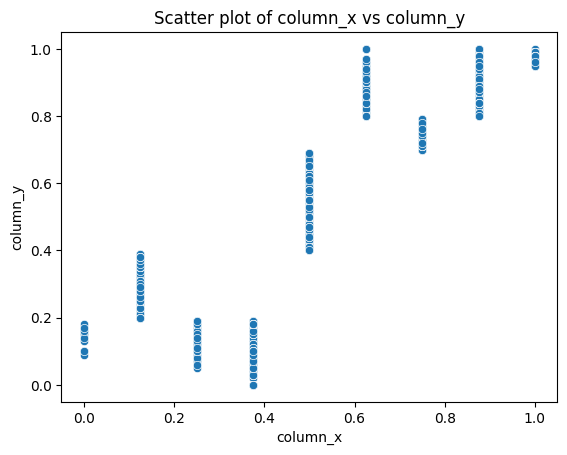

In [ ]:
# consider the relation between two continuous attribute rating and positive ratio
sns.scatterplot(x='rating', y='positive_ratio', data=df_item_1)
plt.title('Scatter plot of column_x vs column_y')
plt.xlabel('column_x')
plt.ylabel('column_y')
plt.show()

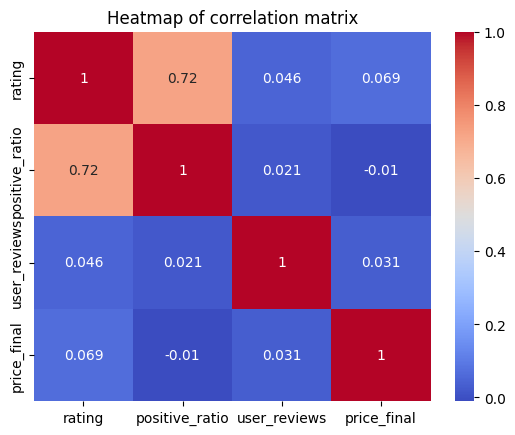

In [ ]:
corr_matrix = df_item_1[['rating','positive_ratio','user_reviews','price_final']].corr()

# Vẽ heatmap bằng seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation matrix')
plt.show()

# show that rating and positive rating has much more ralative

* attribute number_reviews

In [ ]:
# max_reviews = df_item_1['user_reviews'].max()
# min_reviews = df_item_1['user_reviews'].min()

df_item_1['user_reviews'] = df_item_1['user_reviews'].apply(lambda x : x/1000)

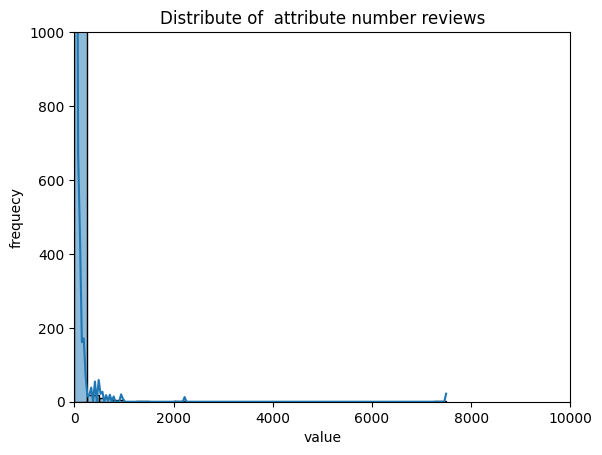

In [ ]:
# distribution of number reviews
ax = sns.histplot(df_item_1['user_reviews'], bins=30, kde=True)
plt.title('Distribute of  attribute number reviews')
ax.set_xlim(0, 10000)
ax.set_ylim(0, 1000)
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()

In [ ]:
del df_item_1['date_release']
del df_item_1['steam_deck']

In [ ]:
del df_item_1['win']
del df_item_1['mac']
del df_item_1['linux']

## process data user


In [ ]:
df_user.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


from matplotlib import pyplot as plt
_df_8['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['products'].plot(kind='hist', bins=20, title='products')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['reviews'].plot(kind='hist', bins=20, title='reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='user_id', y='products', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='products', y='reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['products'].plot(kind='line', figsize=(8, 4), title='products')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['reviews'].plot(kind='line', figsize=(8, 4), title='reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

* attribute reviews

In [ ]:
# filtering user who have number reviews higher than 40
df_user_1 = df_user.copy()
df_user_1 = df_user_1[df_user_1['reviews'] >= 40]


* attribute products

In [ ]:
df_user_1['products'] = df_user_1['products'].apply(lambda x : x/1000)

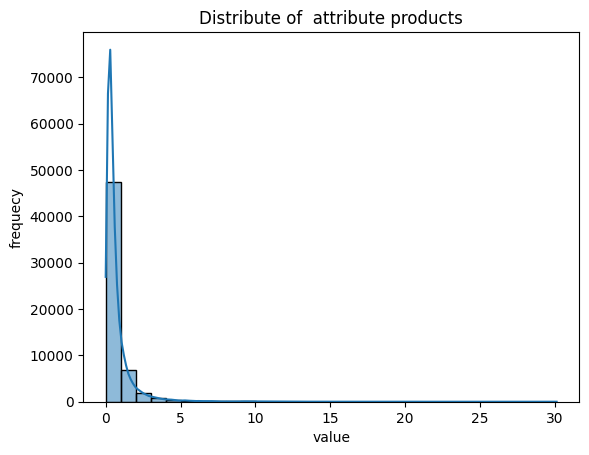

In [ ]:
sns.histplot(df_user_1['products'], bins=30, kde=True)
plt.title('Distribute of  attribute products')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()

* add new attribute (mean sample price)

In [ ]:
df_rec_1 = pd.merge(df_rec, df_user_1 , on = 'user_id')

In [ ]:
df_rec_1.dropna()

,app_id,is_recommended,hours,user_id,review_id,products,reviews
0,602960,1,0.0419,737481,58,1.320,63
1,284160,1,0.0089,737481,456974,1.320,63
2,1599660,1,0.0037,737481,711654,1.320,63
3,1313140,1,0.0023,737481,1673760,1.320,63
4,582660,1,0.0133,737481,1775522,1.320,63
...,...,...,...,...,...,...,...
4354669,209000,1,0.0480,14194664,41103906,0.329,51
4354670,287390,1,0.0090,14194664,41110192,0.329,51
4354671,42680,1,0.0060,14194664,41128377,0.329,51
4354672,866800,1,0.0170,14194664,41141514,0.329,51


In [ ]:
# filter with user having more than 40 interaction with item
print(len(df_rec_1['user_id'].unique()))
print(len(df_user_1))

57973
57973


In [ ]:
df_rec_2 = df_rec_1[['app_id','is_recommended','hours','user_id']]

In [ ]:
# merge with df_item_1 to take mean_sample price products of user
df_rec_3 = pd.merge(df_rec_2,df_item_1, on = 'app_id')

In [ ]:
del df_rec_3['rating']
del df_rec_3['positive_ratio']
del df_rec_3['user_reviews']

In [ ]:
df_rec_3.head()

,app_id,is_recommended,hours,user_id,title,price_final
0,602960,1,0.0419,737481,Barotrauma,2.4
1,602960,1,0.0776,11401360,Barotrauma,2.4
2,602960,1,0.1692,8185663,Barotrauma,2.4
3,602960,1,0.0629,9748867,Barotrauma,2.4
4,602960,1,0.0141,8691685,Barotrauma,2.4


In [ ]:
# calculate the mean sample price
mean_sample_price = {'user_id':[],'mean_price':[]}
for key, value in df_rec_3.groupby('user_id'):
  mean_sample_price['user_id'].append(key)
  mean_sample_price['mean_price'].append(value['price_final'].mean())
sample_price = pd.DataFrame(mean_sample_price)

In [ ]:
sample_price.head()

,user_id,mean_price
0,257,1.504122
1,814,2.118405
2,1239,1.255908
3,1699,2.362348
4,1834,1.682146


In [ ]:
df_user_2 = pd.merge(df_user_1, sample_price, on = 'user_id')

In [ ]:
print(len(df_user_2))

57973


In [ ]:
df_user_2.head()

,user_id,products,reviews,mean_price
0,11316351,0.677,68,1.391882
1,4363012,1.001,72,1.530417
2,4893896,0.496,50,1.538980
3,6366584,1.597,129,1.635047
4,11140739,0.286,79,2.056241


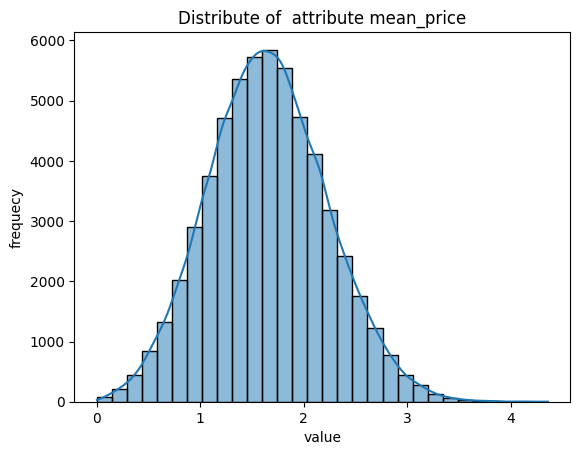

In [ ]:
# show the distribute of new field
sns.histplot(df_user_2['mean_price'], bins=30, kde=True)
plt.title('Distribute of  attribute mean_price')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()


## New attribute category game for item and user

In [ ]:
import json

file_path = "/content/drive/MyDrive/Data/games_metadata.json"

with open(file_path, "r", encoding = 'utf-8') as file:
    dfs = {'app_id':[],'tags':[]}
    for line in file:
        try:
            line = eval(line)
            if line['tags'] != []:
                dfs['app_id'].append(line['app_id'])
                dfs['tags'].append(line['tags'][0])
        except json.JSONDecodeError as e:
            print(f"Không thể phân tích dòng JSON: {line.strip()}")
            print(f"Lỗi: {e}")



In [ ]:
df_tags = pd.DataFrame(dfs)

In [ ]:
df_tags.head()

,app_id,tags
0,13500,Action
1,22364,Action
2,113020,Co-op
3,226560,Zombies
4,249050,Roguelike


In [ ]:
print(len(df_tags))

49628


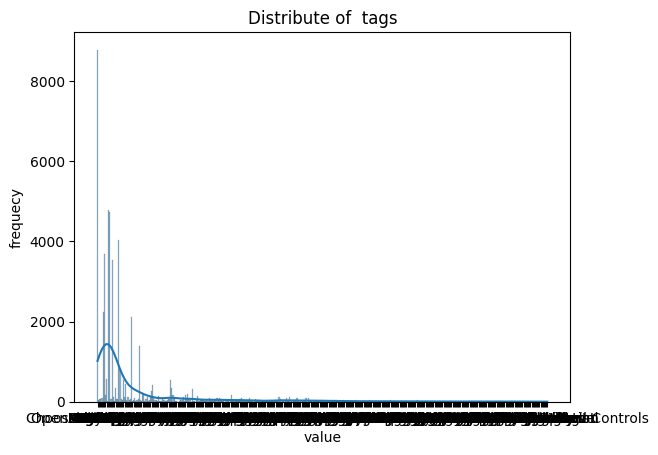

In [ ]:
sns.histplot(df_tags['tags'], bins=30, kde=True)
plt.title('Distribute of  tags')
plt.xlabel('value')
plt.ylabel('frequecy')
plt.show()

In [ ]:
lst_tag =['Atmospheric', 'RPG', 'Strategy', '2D', 'Simulation', 'Casual', 'Adventure', 'Action', 'Singleplayer', 'Indie']


In [ ]:
# merge tags on df_item

df_item_2 = pd.merge(df_item_1,df_tags, on = 'app_id')

In [ ]:
df_item_2.head()

,app_id,title,rating,positive_ratio,user_reviews,price_final,tags
0,13500,Prince of Persia: Warrior Within™,0.875,0.84,2.199,0.999,Action
1,22364,BRINK: Agents of Change,0.625,0.85,0.021,0.299,Action
2,113020,Monaco: What's Yours Is Mine,0.875,0.92,3.722,1.499,Co-op
3,226560,Escape Dead Island,0.500,0.61,0.873,1.499,Zombies
4,249050,Dungeon of the ENDLESS™,0.875,0.88,8.784,1.199,Roguelike


In [ ]:
# transfer tags to one hot vector
df_item_2['tags'] = df_item_2['tags'].apply(lambda x : np.eye(len(lst_tag))[x])

In [ ]:
# merge tags on df_rec
df_rec_4 = pd.merge(df_rec_3,df_item_2[['app_id','tags']], on = 'app_id')

In [ ]:
df_rec_4.head()

,app_id,is_recommended,hours,user_id,title,price_final,tags
0,1475810,1,0.0097,737481,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1475810,1,0.0102,2689434,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1475810,1,0.0083,5147204,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1475810,1,0.0079,13520295,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1475810,1,0.0169,13099571,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
# sample tag for user
sample_tag = {'user_id':[],'tags':[]}

for key , value in df_rec_4.groupby('user_id'):
  sample_tag['user_id'].append(key)
  sample_tag['tags'].append(value['tags'].sum())

In [ ]:
df_sample_tag = pd.DataFrame(sample_tag)

In [ ]:
df_sample_tag.head()

,user_id,tags
0,257,"[8.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 1.0, 2.0, ..."
1,814,"[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, ..."
2,1239,"[19.0, 0.0, 0.0, 0.0, 1.0, 27.0, 2.0, 5.0, 4.0..."
3,1699,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 4.0, 0.0, 0.0, ..."
4,1834,"[5.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


In [ ]:
df_user_3 = pd.merge(df_user_2,df_sample_tag,on='user_id')

In [ ]:
df_user_3.head()

,user_id,products,reviews,mean_price,tags
0,11316351,0.677,68,1.391882,"[8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ..."
1,4363012,1.001,72,1.530417,"[3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ..."
2,4893896,0.496,50,1.538980,"[4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 0.0, 2.0, ..."
3,6366584,1.597,129,1.635047,"[12.0, 0.0, 5.0, 0.0, 1.0, 13.0, 16.0, 1.0, 1...."
4,11140739,0.286,79,2.056241,"[2.0, 0.0, 0.0, 1.0, 0.0, 12.0, 12.0, 1.0, 0.0..."


In [ ]:
# normalizing for reviews
df_user_3['reviews'] = df_user_3['reviews'].apply(lambda x: x /(1000))

## combine data rec, item, user

In [ ]:
df_user_3.head()

,user_id,products,reviews,mean_price,tags
0,11316351,0.677,0.068,1.391882,"[8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ..."
1,4363012,1.001,0.072,1.530417,"[3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ..."
2,4893896,0.496,0.050,1.538980,"[4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 0.0, 2.0, ..."
3,6366584,1.597,0.129,1.635047,"[12.0, 0.0, 5.0, 0.0, 1.0, 13.0, 16.0, 1.0, 1...."
4,11140739,0.286,0.079,2.056241,"[2.0, 0.0, 0.0, 1.0, 0.0, 12.0, 12.0, 1.0, 0.0..."


In [ ]:
df_item_2.head()

,app_id,title,rating,positive_ratio,user_reviews,price_final,tags
0,13500,Prince of Persia: Warrior Within™,0.875,0.84,2.199,0.999,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,22364,BRINK: Agents of Change,0.625,0.85,0.021,0.299,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,113020,Monaco: What's Yours Is Mine,0.875,0.92,3.722,1.499,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,226560,Escape Dead Island,0.500,0.61,0.873,1.499,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,249050,Dungeon of the ENDLESS™,0.875,0.88,8.784,1.199,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_rec_4.head()

,app_id,is_recommended,hours,user_id,title,price_final,tags
0,1475810,1,0.0097,737481,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1475810,1,0.0102,2689434,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1475810,1,0.0083,5147204,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1475810,1,0.0079,13520295,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1475810,1,0.0169,13099571,Ghostwire: Tokyo,5.999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
del df_rec_4['title']


In [ ]:
del df_rec_4['price_final']

In [ ]:
del df_rec_4['tags']

In [ ]:
# convert feature of user and item to vector
feature_user = []
for i in range(len(df_user_3)):
  vector_feature = [df_user_3.loc[i]['products'],df_user_3.loc[i]['reviews'],df_user_3.loc[i]['mean_price']]
  feature_user.append(vector_feature)
df_user_3['features'] = feature_user

feature_item = []
for i in range(len(df_item_2)):
  vector_feature = [df_item_2.loc[i]['rating'],df_item_2.loc[i]['positive_ratio'],df_item_2.loc[i]['user_reviews'],df_item_2.loc[i]['price_final']]
  feature_item.append(vector_feature)
df_item_2['features'] = feature_item

In [ ]:
df_user_3.head()

,user_id,products,reviews,mean_price,tags,features
0,11316351,0.677,0.068,1.391882,"[8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[0.677, 0.068, 1.3918823529411763]"
1,4363012,1.001,0.072,1.530417,"[3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ...","[1.001, 0.072, 1.5304166666666668]"
2,4893896,0.496,0.050,1.538980,"[4.0, 0.0, 0.0, 0.0, 0.0, 2.0, 8.0, 0.0, 2.0, ...","[0.496, 0.05, 1.5389799999999996]"
3,6366584,1.597,0.129,1.635047,"[12.0, 0.0, 5.0, 0.0, 1.0, 13.0, 16.0, 1.0, 1....","[1.597, 0.129, 1.635046511627907]"
4,11140739,0.286,0.079,2.056241,"[2.0, 0.0, 0.0, 1.0, 0.0, 12.0, 12.0, 1.0, 0.0...","[0.286, 0.079, 2.0562405063291136]"


In [ ]:
df_item_2.head()

,app_id,title,rating,positive_ratio,user_reviews,price_final,tags,features
0,13500,Prince of Persia: Warrior Within™,0.875,0.84,2.199,0.999,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.84, 2.199, 0.999]"
1,22364,BRINK: Agents of Change,0.625,0.85,0.021,0.299,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.625, 0.85, 0.021, 0.29900000000000004]"
2,113020,Monaco: What's Yours Is Mine,0.875,0.92,3.722,1.499,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.92, 3.722, 1.499]"
3,226560,Escape Dead Island,0.500,0.61,0.873,1.499,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5, 0.61, 0.873, 1.499]"
4,249050,Dungeon of the ENDLESS™,0.875,0.88,8.784,1.199,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.88, 8.784, 1.199]"


In [ ]:
# merge feature and tags on df_rec
df_rec_5 = pd.merge(df_rec_4,df_user_3[['user_id','tags','features']], on = 'user_id')

In [ ]:
df_rec_5.head()

,app_id,is_recommended,hours,user_id,tags,features
0,1475810,1,0.0097,737481,"[2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[1.32, 0.063, 2.1839682539682537]"
1,1125240,1,0.0019,737481,"[2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[1.32, 0.063, 2.1839682539682537]"
2,1761390,1,0.0010,737481,"[2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[1.32, 0.063, 2.1839682539682537]"
3,235800,1,0.0195,737481,"[2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[1.32, 0.063, 2.1839682539682537]"
4,253710,0,0.0008,737481,"[2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[1.32, 0.063, 2.1839682539682537]"


In [ ]:
df_rec_5 = df_rec_5.rename(columns={'tags': 'tags_user', 'features': 'features_user'})

In [ ]:
df_rec_6 = pd.merge(df_rec_5,df_item_2[['app_id','tags','features']], on = 'app_id')

In [ ]:
df_rec_6.head()

,app_id,is_recommended,hours,user_id,tags_user,features_user,tags,features
0,1475810,1,0.0097,737481,"[2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...","[1.32, 0.063, 2.1839682539682537]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.83, 7.451, 5.9990000000000006]"
1,1475810,1,0.0102,2689434,"[5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 2.0, ...","[0.179, 0.042, 2.797190476190476]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.83, 7.451, 5.9990000000000006]"
2,1475810,1,0.0083,5147204,"[5.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 4.0, 6.0, ...","[0.702, 0.116, 2.459681034482759]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.83, 7.451, 5.9990000000000006]"
3,1475810,1,0.0079,13520295,"[23.0, 1.0, 1.0, 0.0, 0.0, 10.0, 12.0, 0.0, 9....","[0.955, 0.285, 2.6247929824561402]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.83, 7.451, 5.9990000000000006]"
4,1475810,1,0.0169,13099571,"[31.0, 0.0, 1.0, 1.0, 0.0, 11.0, 3.0, 0.0, 7.0...","[0.358, 0.177, 2.6820960451977403]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.875, 0.83, 7.451, 5.9990000000000006]"


In [ ]:
df_rec_6 = df_rec_6.rename(columns={'tags': 'tags_item', 'features': 'features_item'})

## final data

In [ ]:
# data user , item
df_user_3.to_pickle('data_user.pkl')
df_item_2.to_pickle('data_item.pkl')

In [ ]:
# data rec with one feature
df_rec_4.to_pickle('data_rec.pkl')
# data rec with featrue
df_rec_6.to_pickle('data_rec_fearure.pkl')